In [1]:
import numpy as np

import matplotlib.pyplot as plt
import nibabel as nib


%matplotlib inline

In [2]:
timeseries = np.load('/mnt/ssd1/j1c/marguiles/timeseries/timeseries.sub-010122.npy')

timeseries.shape

(18715, 2608)

In [3]:
variance = timeseries.var(axis=1)

variance.shape

(18715,)

In [4]:
# plot on fsa5 surface:
from nilearn import datasets, plotting
fsa5 = datasets.fetch_surf_fsaverage()

/home/j1c/graphstats/venv/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')


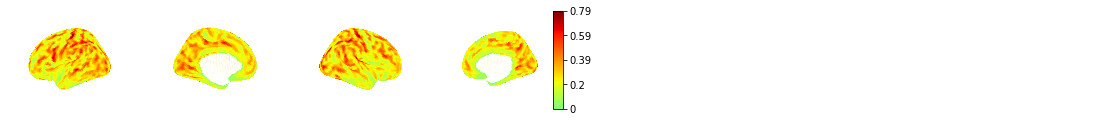

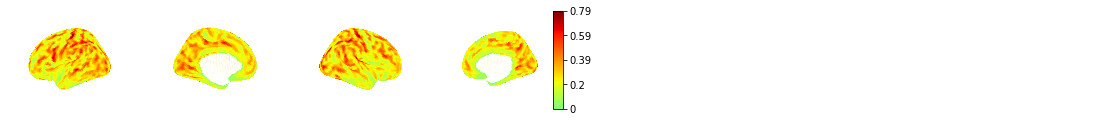

In [5]:
fig, ax = plt.subplots(1, 4, subplot_kw={'projection': '3d'}, figsize=(10, 3))
X = variance

cortex_left = nib.freesurfer.read_label('lh.cortex.label')

conn_map = np.zeros(10242)
conn_map[cortex_left] = X[:len(cortex_left)]

plotting.plot_surf_stat_map(fsa5.infl_left, 
  conn_map, hemi='left', colorbar=False, cmap='jet', axes = ax[0])

plotting.plot_surf_stat_map(fsa5.infl_left,
  conn_map, hemi='left', colorbar=False, cmap='jet', view='medial', axes=ax[1])

cortex_right = nib.freesurfer.read_label('rh.cortex.label')

conn_map2 = np.zeros(10242)
conn_map2[cortex_right] = X[len(cortex_left):]

plotting.plot_surf_stat_map(fsa5.infl_right, 
  conn_map2, hemi='right', colorbar=False, cmap='jet', axes = ax[2])

plotting.plot_surf_stat_map(fsa5.infl_right,
  conn_map2, hemi='right', colorbar=True, cmap='jet', view='medial', axes=ax[3])

In [6]:
fig.savefig('./figures/mpi_sub-010122_timeseries_var_brain.png', dpi=300, bbox_inches='tight')